In [11]:
from keras.models import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


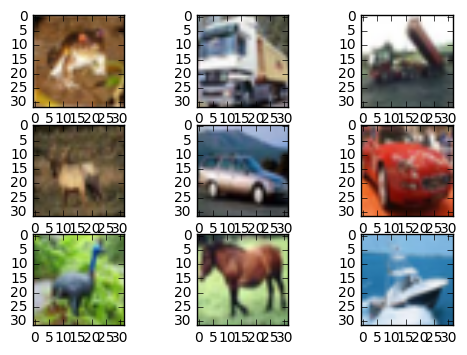

In [14]:
for i in range(0,9):
    plt.subplot(330 + (1 + i) # row-column-number
    plt.imshow(toimage(X_train[i]))

In [16]:
import numpy
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [21]:
seed = 7
numpy.random.seed(seed)

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalization

In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [20]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Modeling

In [25]:
model = Sequential()
model.add((Conv2D(32,(3,3), input_shape=(3,32,32), padding='same', activation='relu', kernel_constraint=maxnorm(3))))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compiling

In [26]:
epochs = 25
lr = 0.01
decay = lr/epochs
sgd = SGD(lr=lr, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

# Fitting

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print "Accuracy: %.2f%%" % (scores[1]*100)

ValueError: Error when checking target: expected dense_2 to have shape (None, 10) but got array with shape (50000, 1)